### Official State Tree of Colorado
##### The magnificent Colorado blue spruce (Picea pungens) is the official state tree of Colorado. School children of the state voted to name blue spruce as the state tree on Arbor Day in 1892, however it was not until 1939 that the Colorado blue spruce was officially adopted as the tree symbol of Colorado.
##### Known for its stately, majestic, symmetrical form and its beautiful silver-blue color, the Colorado blue spruce was first discovered on Pikes Peak in 1862 by botanist C.C. Parry, and named by George Engelmann in 1879. Blue spruce (Picea pungens Engelm) is also the state tree of Utah.
##### Sometimes called the silver spruce, the Colorado blue spruce ranges in color from green to blue to silver. In Colorado, it grows in small, scattered groves or singly among ponderosa pine, Douglas fir, alpine fir and Englemann spruce.
source https://statesymbolsusa.org/symbol/colorado/tree/colorado-blue-spruce

#### Habitat
##### Native Range
Blue spruce is primarily native to the central and southern Rocky Mountains of the western United States. Its range extends from latitude 33° 50' to 48° 54' N. and from longitude 104° 45' to 114° 00' W.; the Rocky Mountain region in high mountains from southern and western Wyoming, eastern Idaho, south to Utah, northern and eastern Arizona, southern New Mexico, to central Colorado. It has been reported in isolated locations in north-central Montana.

##### Climate
Blue spruce grows in a climatic zone that is generally cool and humid, with most of the annual precipitation occurring in the summer.

Mean annual temperatures where blue spruce is most commonly found in Colorado and the Southwest range from 3.9° to 6.1° C (39° to 43° F), with a January mean of -3.9° to -2.8° C (25° to 27° F) and a July mean of 13.9° to 15.0° C (57° to 59° F). Mean minimum January temperatures range from -11.1° to 8.9° C (12° to 16° F) and mean maximum July temperatures range from 21.1° to 22.2° C (70° to 72° F). The frost-free period from June to August is about 55 to 60 days (5,69).

Average annual precipitation varies from 460 to 610 mm (18 to 24 in). Winter is usually precipitation-deficient, with less than 20 percent of the annual moisture falling from December through March. Fifty percent of the annual precipitation is rain that falls during the growing season (5,69).

Although blue spruce grows best with abundant moisture, this species can withstand drought better than any other spruce (36). It can also withstand extremely low temperatures (-40° C; -40° F), and it is more resistant to high insolation and frost damage than other associated species.

##### Soils and Topography
Basic information on soils and landforms needed for silvicultural decisions for blue spruce is limited. Both soils and landforms are very complex. Soils are young and vary widely in texture and physical and chemical properties according to the bedrock from which they originate. Glacial deposits, alluvium from streams, and material weathered in place from country rock are predominant, however (2). The pH is 6.8 to 7.2, neutral to slightly alkaline (21,62). The soils on which blue spruce grows naturally are in the order Mollisols and, to a lesser extent, in the orders Histosols and Inceptisols.

Blue spruce is found on gentle upland and subirrigated slopes, in well-watered tributary drainages, extending down intermittent streams, and on lower northerly slopes. Sites on which blue spruce grows are more moist than those of Rocky Mountain ponderosa pine (Pinus ponderosa var. scopulorum) and warmer than those of Engelmann spruce (Picea engelmannii) and subalpine fir (Abies lasiocarpa) (2,65). In Utah, blue spruce is considered a pioneer tree species on wet soils (21).

Blue spruce is characteristically found at elevations from 1830 to 2740 m (6,000 to 9,000 ft) in its northern range and from 2130 to 3050 m (7,000 to 10,000 ft) in its southern range (27,65

source: https://www.srs.fs.usda.gov/pubs/misc/ag_654/volume_1/picea/pungens.htm

DATA to gather
from https://www2.census.gov/geo/tiger/TIGER2024/COUNTY/
Boulder County Outline 
Linear and area hydrography
At least one soil variable from the POLARIS dataset
Elevation from the SRTM (available from the APPEEARS API)
At least one climate variable from the MACAv2 dataset, accessible from Climate Toolbox. 

Possibly helpful https://pygis.io/docs/d_access_census.html
Census Data API key is 087d00b52d84075f630f0c4b15e3a0c683e5bdd1 for geba2669@colorado.edu
need to pip install census
https://medium.com/@wwjiang/exploring-u-s-census-data-with-python-a-step-by-step-guide-to-open-data-analysis-3f729f8033ad

In [4]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
# Open up the counties boundaries

cwd = os.getcwd()

SHAPE_RESTORE_SHX = True

print(cwd)

a_path = os.path.join(cwd,'tl_2024_us_county.shp')

print(a_path)

counties_gdf = (
     gpd.read_file(a_path)
) 

counties_gdf.head


# # We'll name the index so it will match the other data
# counties_gdf.index.name = 'FIPS'

# # Plot the ecoregions to check download
# counties_gdf.plot(edgecolor='black', color='skyblue')

c:\Users\gpaul\Documents\GitHub\bluespruce
c:\Users\gpaul\Documents\GitHub\bluespruce\tl_2024_us_county.shp


DataSourceError: c:\Users\gpaul\Documents\GitHub\bluespruce\tl_2024_us_county.shp: No such file or directory

In [5]:
import os
import geopandas as gpd

# Current working directory
cwd = os.getcwd()

# Path to shapefile
a_path = os.path.join(cwd, 'tl_2024_us_county.shp')

# Check if the .shx file exists
shx_path = os.path.splitext(a_path)[0] + '.shx'

if not os.path.exists(shx_path):
    print(f".shx file is missing at {shx_path}. Attempting to regenerate...")

    # Read the shapefile without .shx (if possible)
    counties_gdf = gpd.read_file(a_path)

    # Write it back to recreate missing .shx file
    counties_gdf.to_file(a_path)

    print(".shx file successfully regenerated.")
else:
    # If .shx exists, load the GeoDataFrame as usual
    counties_gdf = gpd.read_file(a_path)

# Display the first few rows of the GeoDataFrame
print(counties_gdf.head)

counties_gdf.STATEFP


.shx file is missing at c:\Users\gpaul\Documents\GitHub\bluespruce\tl_2024_us_county.shx. Attempting to regenerate...


DataSourceError: c:\Users\gpaul\Documents\GitHub\bluespruce\tl_2024_us_county.shp: No such file or directory

In [6]:
import geopandas    

boulder_gdf = counties_gdf[(counties_gdf.STATEFP=='08') & (counties_gdf.NAME=='Boulder')]

## Go back later and try to get this directly from the census site rather than local files.

# Define the path for the output shapefile
output_path = 'boulder_county.shp'

# Write the GeoDataFrame to a shapefile
boulder_gdf.to_file(output_path, driver='ESRI Shapefile')

boulder_gdf.plot()


NameError: name 'counties_gdf' is not defined

ImportError: Missing optional dependency 'pyarrow.feather'. pyarrow is required for Feather support.  "
        "Use pip or conda to install pyarrow.feather.

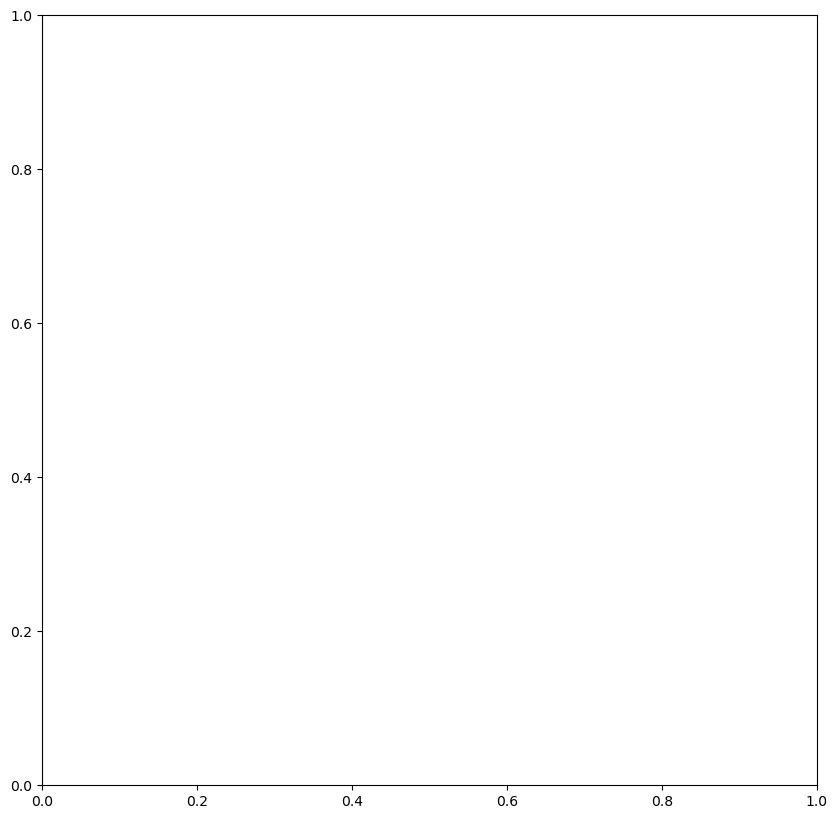

In [12]:
# fixing to use existing shapefiles generated
import os
import geopandas as gpd

ar_path = os.path.join(cwd, 'tl_2024_08013_areawater.shp')
li_path = os.path.join(cwd, 'tl_2024_08013_linearwater.shp')
co_path = os.path.join(cwd, 'boulder_county.shp')

# Create a new plot
fig, ax = plt.subplots(figsize=(10, 10))
      
boulder_areawater_gdf = gpd.read_file(ar_path)
boulder_linearwater_gdf = gpd.read_file(li_path)
boulder_gdf = gpd.read_feather(co_path)

boulder_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, label='Boulder County')
boulder_areawater_gdf.plot(ax=ax, color='blue', alpha=0.6, label='Area Water')
boulder_linearwater_gdf.plot(ax=ax, color='blue', linewidth=0.5, label='Linear Water')

In [8]:
boulder_linearwater_gdf.head

<bound method NDFrame.head of      ANSICODE      LINEARID            FULLNAME ARTPATH  MTFCC  \
0        None  110707441616                None       N  H3010   
1        None  110707441617                None       N  H3010   
2        None  110707441603                None       N  H3010   
3        None  110707442474                None       N  H3010   
4        None  110707441629                None       N  H3010   
...       ...           ...                 ...     ...    ...   
3981     None  110707442684                None       N  H3010   
3982     None  110707442686                None       N  H3010   
3983     None  110707432908         Hunters Crk       N  H3010   
3984     None  110707440348  North St Vrain Crk       N  H3010   
3985     None  110707442420                None       N  H3010   

                                               geometry  
0     LINESTRING (-105.46613 40.06176, -105.46619 40...  
1     LINESTRING (-105.46513 40.06196, -105.46518 40...  
2  

C:\Users\gpaul\AppData\Local\Temp\ipykernel_23252\568772986.py:29: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


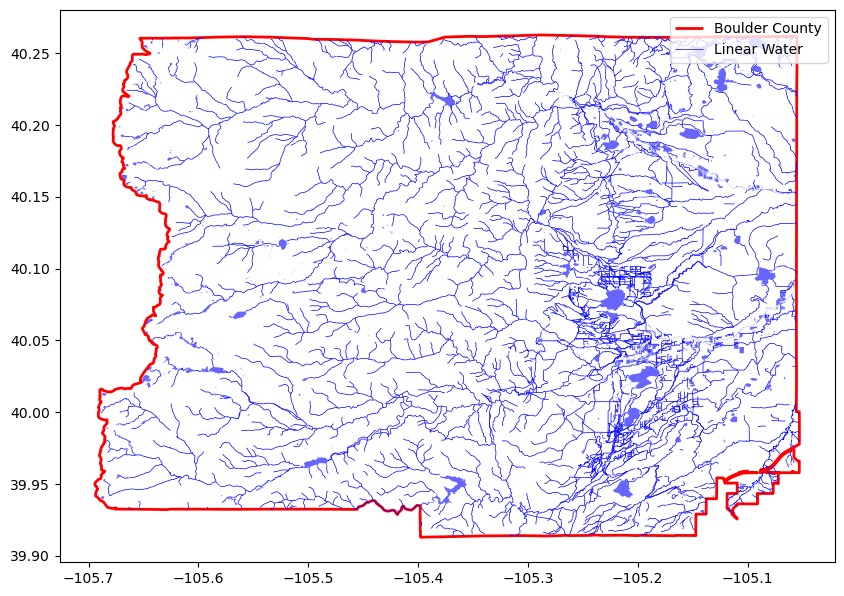

In [15]:
# Import necessary libraries
import os
import geopandas as gpd
import matplotlib.pyplot as plt  # Ensure matplotlib is imported
# import pyarrow  # Ensure pyarrow is available

# Define the current working directory (replace `cwd` with the appropriate path)
cwd = os.getcwd()

# Define file paths
ar_path = os.path.join(cwd, 'tl_2024_08013_areawater.shp')
li_path = os.path.join(cwd, 'tl_2024_08013_linearwater.shp')
co_path = os.path.join(cwd, 'boulder_county.shp')

# Create a new plot
fig, ax = plt.subplots(figsize=(10, 10))

# Read the shapefiles
boulder_areawater_gdf = gpd.read_file(ar_path)
boulder_linearwater_gdf = gpd.read_file(li_path)
boulder_gdf = gpd.read_file(co_path)  # Use read_file for shapefiles

# Plot the data
boulder_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, label='Boulder County')
boulder_areawater_gdf.plot(ax=ax, color='blue', alpha=0.6, label='Area Water')
boulder_linearwater_gdf.plot(ax=ax, color='blue', linewidth=0.5, label='Linear Water')

# Add a legend and show the plot
ax.legend()
plt.show()


In [16]:
%store boulder_gdf boulder_areawater_gdf boulder_linearwater_gdf

Stored 'boulder_gdf' (GeoDataFrame)
Stored 'boulder_areawater_gdf' (GeoDataFrame)
Stored 'boulder_linearwater_gdf' (GeoDataFrame)


C:\Users\gpaul\AppData\Local\Temp\ipykernel_23252\1279709129.py:42: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


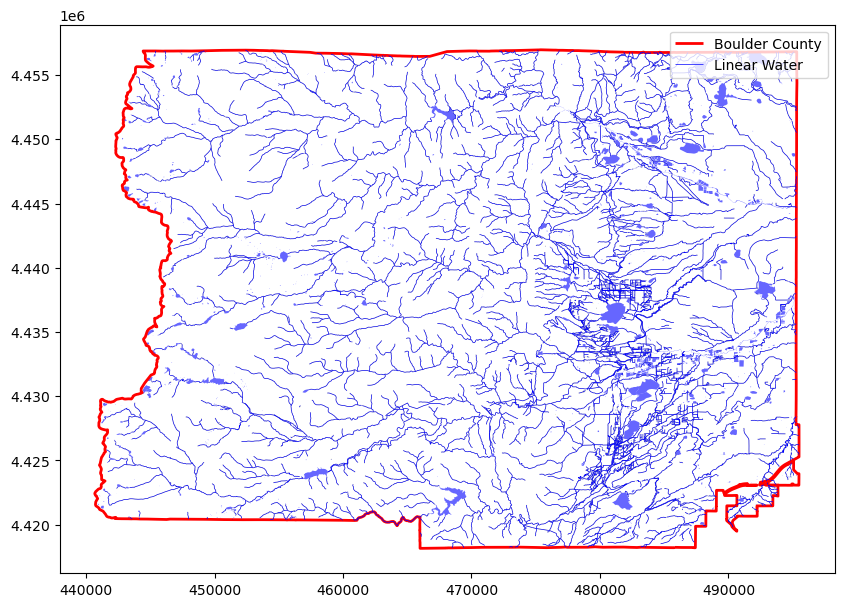

Buffer shapefile saved to: c:\Users\gpaul\Documents\GitHub\bluespruce\linearwater_buffer_utm13N.shp


In [19]:
# Import necessary libraries
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the current working directory (replace `cwd` with the appropriate path)
cwd = os.getcwd()

# Define file paths
ar_path = os.path.join(cwd, 'tl_2024_08013_areawater.shp')
li_path = os.path.join(cwd, 'tl_2024_08013_linearwater.shp')
co_path = os.path.join(cwd, 'boulder_county.shp')
buffer_output_path = os.path.join(cwd, 'linearwater_buffer_utm13N.shp')  # Output path for buffer shapefile

# Create a new plot
fig, ax = plt.subplots(figsize=(10, 10))

# Read the shapefiles
boulder_areawater_gdf = gpd.read_file(ar_path)
boulder_linearwater_gdf = gpd.read_file(li_path)
boulder_gdf = gpd.read_file(co_path)

# Reproject to UTM Zone 13N (EPSG:32613)
boulder_areawater_gdf = boulder_areawater_gdf.to_crs(epsg=32613)
boulder_linearwater_gdf = boulder_linearwater_gdf.to_crs(epsg=32613)
boulder_gdf = boulder_gdf.to_crs(epsg=32613)

# Create a 30-meter buffer around linear water features
linearwater_buffer_gdf = boulder_linearwater_gdf.copy()
linearwater_buffer_gdf['geometry'] = linearwater_buffer_gdf.buffer(30)

# Save the buffer to a shapefile with the UTM 13N CRS
linearwater_buffer_gdf.to_file(buffer_output_path, driver='ESRI Shapefile')

# Plot the data
boulder_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, label='Boulder County')
boulder_areawater_gdf.plot(ax=ax, color='blue', alpha=0.6, label='Area Water')
boulder_linearwater_gdf.plot(ax=ax, color='blue', linewidth=0.5, label='Linear Water')
linearwater_buffer_gdf.plot(ax=ax, color='yellow', alpha=0.3, label='30m Buffer')

# Add a legend and show the plot
ax.legend()
plt.show()

print(f"Buffer shapefile saved to: {buffer_output_path}")


In [22]:
#reproject boulder county to UTM 13 N
# # Import necessary libraries
import os
import geopandas as gpd

# Define the current working directory (replace `cwd` with the appropriate path)
cwd = os.getcwd()

# Define file paths
co_path = os.path.join(cwd, 'boulder_county.shp')
output_path = os.path.join(cwd, 'boulder_county_utm13N.shp')  # New shapefile path

# Read the boulder_county shapefile
boulder_gdf = gpd.read_file(co_path)

# Reproject to UTM Zone 13N (EPSG:32613)
boulder_gdf_utm = boulder_gdf.to_crs(epsg=32613)

# Save the reprojected GeoDataFrame to a new shapefile
boulder_gdf_utm.to_file(output_path, driver='ESRI Shapefile')

print(f"Reprojected shapefile saved to: {output_path}")


Reprojected shapefile saved to: c:\Users\gpaul\Documents\GitHub\bluespruce\boulder_county_utm13N.shp


<Axes: >

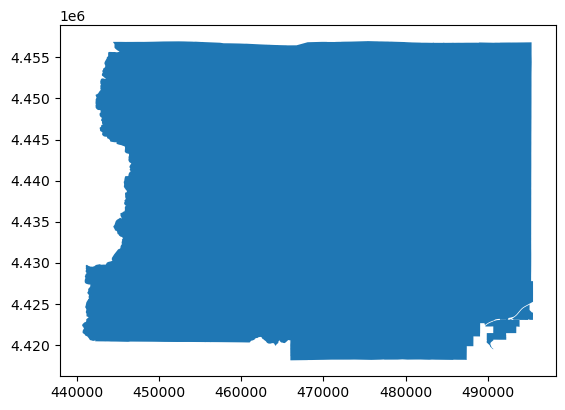

In [23]:
boulder_utm_gdf = gpd.read_file('boulder_county_utm13N.shp')
boulder_utm_gdf.plot()

<Axes: >

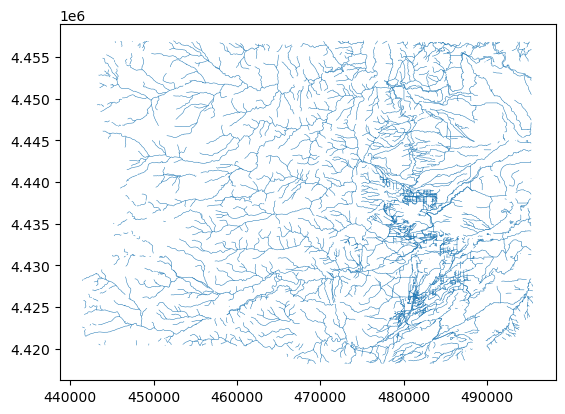

In [20]:
linearwater_buffer_gdf.plot()

### everything past this is prototype

In [ ]:
# Import for census
# import matplotlib.pyplot as plt
# import pandas as pd
# import geopandas as gpd
# from census import Census  # not working
# from us import states
# import os

# # Set API key
# c = Census("075f630f0c4b15e3a0c683e5bdd1")

In [ ]:
# import rioxarray as rxr

# soil_url_template = (
#     "http://hydrology....POLARIS
#     "/ph"
#     "/mean"
#     "60_100"
#     "/lat{min_lat}{max_la}_lon{max_lon}{min_lon}.tif   # because negative vs W listing
# )

# min_lat=26
# min_lon=80

# soil_da
